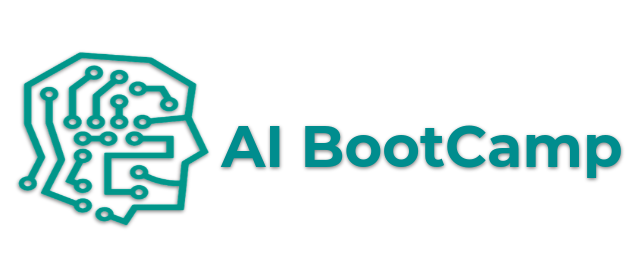

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
import time

In [6]:
from IPython.display import clear_output

In [7]:
%matplotlib inline

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
terrorism=pd.read_csv('globalterrorismdb.csv',encoding='ISO-8859-1',low_memory=False)

In [10]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104689 entries, 0 to 104688
Columns: 123 entries, eventid to dbsource
dtypes: float64(52), int64(17), object(54)
memory usage: 98.2+ MB


In [11]:
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS


In [12]:
terrorism.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

#Keep 20 columns
data = terrorism[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]


In [13]:
data.head()

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0
1,197000000002,1970,Mexico,North America,NaN,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,NaN,Tarlac,1,1,1,1,0,Assassination,Journalists & Media,United States,Unknown,0.0,NaN,Unknown,1.0,0.0
3,197001000002,1970,Greece,Western Europe,NaN,Athens,1,1,1,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0.0,NaN,Explosives/Bombs/Dynamite,NaN,NaN
4,197001000003,1970,Japan,East Asia,NaN,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0.0,NaN,Incendiary,NaN,NaN


In [14]:
data.tail()

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound
104684,201112310008,2011,Pakistan,South Asia,Federally Administered Tribal Areas,Landi Kotal,1,1,1,1,0,Bombing/Explosion,Private Citizens & Property,Pakistan,Unknown,0.0,0.0,Explosives/Bombs/Dynamite,2.0,13.0
104685,201112310013,2011,Iraq,Middle East & North Africa,Kirkuk,Kirkuk,1,1,1,1,0,Bombing/Explosion,Private Citizens & Property,Iraq,Unknown,0.0,0.0,Explosives/Bombs/Dynamite,0.0,1.0
104686,201112310018,2011,Pakistan,South Asia,Federally Administered Tribal Areas (FATA),Landi Kotal,1,1,1,1,0,Bombing/Explosion,Private Citizens & Property,Pakistan,Unknown,0.0,0.0,Explosives/Bombs/Dynamite,2.0,4.0
104687,201112310019,2011,Pakistan,South Asia,Federally Administered Tribal Areas (FATA),Boya,1,1,0,1,0,Bombing/Explosion,Military,Pakistan,Tehrik-i-Taliban Pakistan (TTP),1.0,0.0,Explosives/Bombs/Dynamite,2.0,NaN
104688,201112310021,2011,Pakistan,South Asia,Federally Administered Tribal Areas (FATA),Landi Kotal,1,1,1,1,0,Bombing/Explosion,Private Citizens & Property,Pakistan,Unknown,0.0,0.0,Explosives/Bombs/Dynamite,2.0,4.0


In [15]:
print('Country with the highest number of terrorist Attacks:',data['Country'].value_counts().index[0])

Country with the highest number of terrorist Attacks: Iraq


In [16]:
data['Country'].value_counts()

Iraq                     7807
Colombia                 7453
India                    6905
Peru                     6046
Pakistan                 5510
                         ... 
Virgin Islands (U.S.)       1
Bermuda                     1
Gibraltar                   1
South Vietnam               1
North Korea                 1
Name: Country, Length: 209, dtype: int64

In [17]:
print('Region with the highest number of Terrorist Attacks:',data['Region'].value_counts().index[0])

Region with the highest number of Terrorist Attacks: Middle East & North Africa


In [18]:
print('Maximum number of people were killed by a single terrorist attack are',data['Nkill'].max())

Maximum number of people were killed by a single terrorist attack are 1381.5


In [19]:
data['Damage']=data['Nkill']+data['Nwound']

In [20]:
data['Damage']

0          1.0
1          0.0
2          1.0
3          NaN
4          NaN
          ... 
104684    15.0
104685     1.0
104686     6.0
104687     NaN
104688     6.0
Name: Damage, Length: 104689, dtype: float64

In [21]:
data['Country']=data['Country'].replace('South Veitnam','Veitnam',regex=True)

In [22]:
data['Weaptype']=data['Weaptype'].replace('Vehicle .*','Vehicle',regex=True)

In [23]:
data['Attacktype']=data['Attacktype'].replace('Hostage Taking .*','Hostage Taking',regex=True)

In [24]:
atk_filtered=data['Attacktype'].apply(lambda x:x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                          'Hostage Taking','Facility/Infrastructure Attack'] else 'Others')

In [25]:
attack_type=atk_filtered.value_counts().tolist()

In [26]:
attack_type

[47123, 26621, 14465, 6999, 6090, 3391]

In [27]:
labels=['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack','Others']

In [28]:
sizes=[]

In [29]:
for i in attack_type:
    percent=(i*100)/len(data['Attacktype'])
    sizes.append(percent)

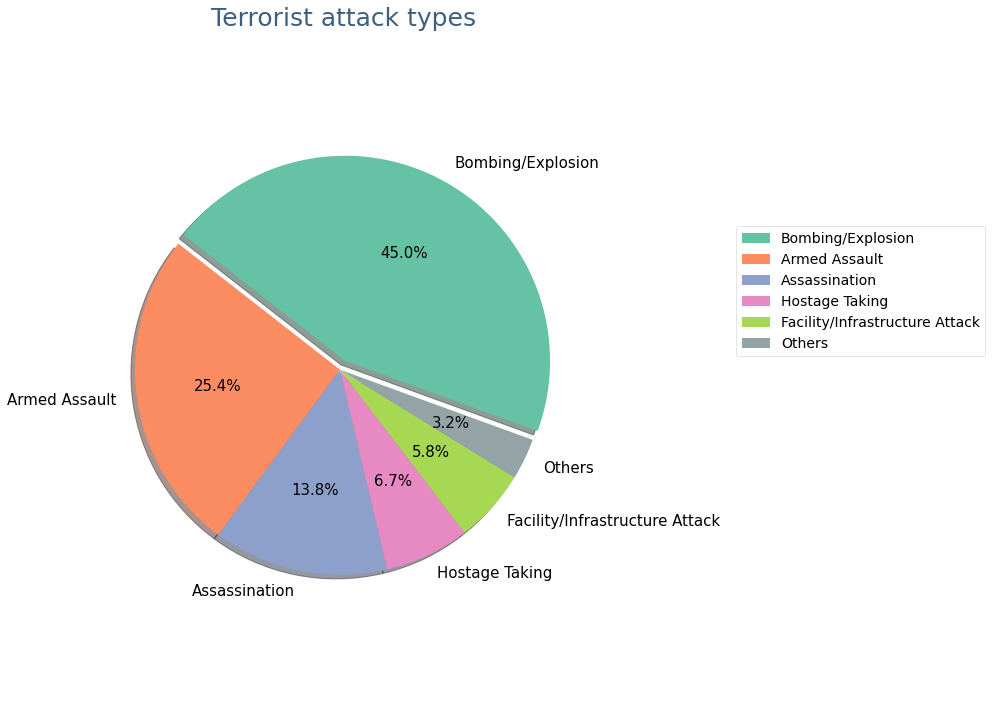

In [30]:
fig,ax=plt.subplots(figsize=(10,10))
patches,texts,autotexts=ax.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=-20,
                              shadow=True,explode=(0.05,0,0,0,0,0),
                              colors=sns.color_palette('Set2',8)[:5]+
                              [(0.58,0.64,0.65)],
                              textprops={'fontsize':15,'weight':'light','color':'k'})
ax.axis('equal')
plt.title('Terrorist attack types',fontsize=25,pad=-70,
         color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.tight_layout()
ax.legend(loc='lower right',framealpha=0.5,bbox_to_anchor=(1.8,0.5,0.1,1),
         prop={'size':14})
fig.show()

In [31]:
cat=['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack']

In [32]:
color_cat=sns.color_palette('Set2',8)[:5]

In [33]:
color_cat_dict=dict(zip(cat,color_cat))

In [34]:
table1=data[['Attacktype','Damage']].groupby('Attacktype',as_index=False).sum().sort_values(by='Damage',ascending=False)

In [35]:
table1=table1.reset_index()

In [36]:
inci=[8825,42669,7276,19312,12149,659,1015,10356]

In [37]:
table1['Incidents']=np.array(inci)

In [38]:
table1['Damage rate']=table1['Damage']/table1['Incidents']

In [39]:
table1

,index,Attacktype,Damage,Incidents,Damage rate
0,2,Bombing/Explosion,275608.066667,8825,31.230376
1,0,Armed Assault,166712.000000,42669,3.907099
2,1,Assassination,27364.000000,7276,3.760858
3,7,Unknown,13896.000000,19312,0.719553
4,3,Facility/Infrastructure Attack,6927.666667,12149,0.570225
5,5,Hostage Taking,6538.000000,659,9.921093
6,6,Unarmed Assault,2549.000000,1015,2.511330
7,4,Hijacking,982.000000,10356,0.094824


In [40]:
labels=table1['Attacktype'].tolist()
labels

['Bombing/Explosion',
 'Armed Assault',
 'Assassination',
 'Unknown',
 'Facility/Infrastructure Attack',
 'Hostage Taking',
 'Unarmed Assault',
 'Hijacking']

In [41]:
x=np.arange(len(labels))

In [42]:
dmg=table1['Damage'].tolist()

In [43]:
dmg

[275608.066666597,
 166712.000000001,
 27364.0,
 13896.0,
 6927.666666671,
 6538.0,
 2549.0,
 982.0]

In [44]:
gray=(0.5,0.64,0.65)

In [45]:
color_list=[color_cat_dict[ter_type] if
            ter_type in color_cat_dict.keys() else gray for ter_type in labels]

In [46]:
color_list

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.5, 0.64, 0.65),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.5, 0.64, 0.65),
 (0.5, 0.64, 0.65)]

In [47]:
d_rate=table1['Damage rate'].tolist()

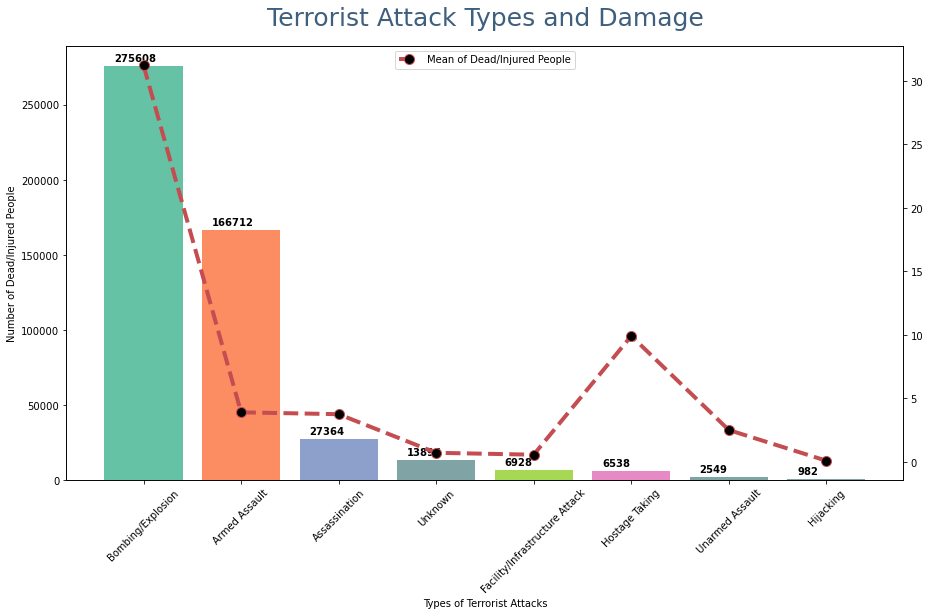

In [48]:
fig,ax1=plt.subplots(figsize=(15,8))
# Bar chart
ax1.bar(labels,dmg,color=color_list,align='center')
#Number in bar chart
for i,v in enumerate(dmg):
    ax1.text(i-0.3,v-13000 if v==37209 else v+3000, str(round(v)),color='w' if v==37209 else 'k',fontweight='bold')
#insert a second plot -line plot
ax2=ax1.twinx()
ax2.plot(labels,d_rate,linestyle='--',linewidth=4,marker='o',markerfacecolor='black',markersize='10',
        label='Mean of Dead/Injured People',color='#C44D51')
plt.title('Terrorist Attack Types and Damage',fontsize=25,pad=20, color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
ax1.set(xlabel='Types of Terrorist Attacks',ylabel='Number of Dead/Injured People')
ax1.set_xticklabels(labels,rotation=45)
plt.yticks(fontsize=10)
ax2.legend(loc='upper center')
fig.show()

In [49]:
table2=data[['Weaptype','Damage']].groupby('Weaptype',as_index=False).sum().sort_values(by='Damage',ascending=False)

In [50]:
df_count=data['Weaptype'].value_counts()

In [51]:
df_count=df_count.reindex(table2['Weaptype'].values)

In [52]:
df_count

Explosives/Bombs/Dynamite    48435
Firearms                     36937
Unknown                       8840
Melee                         2276
Chemical                       178
Incendiary                    7720
Biological                      32
Vehicle                         53
Sabotage Equipment             111
Other                           62
Fake Weapons                    32
Radiological                    13
Name: Weaptype, dtype: int64

In [53]:
table2['WeapCount']=df_count.values

In [54]:
table2['WeapCount']

2     48435
4     36937
10     8840
6      2276
1       178
5      7720
0        32
11       53
9       111
7        62
3        32
8        13
Name: WeapCount, dtype: int64

In [55]:
table2['Weap_damage_rate']=table2['Damage']/table2['WeapCount']

In [56]:
table2

,Weaptype,Damage,WeapCount,Weap_damage_rate
2,Explosives/Bombs/Dynamite,281469.733333,48435,5.811288
4,Firearms,165056.000000,36937,4.468582
10,Unknown,27038.000000,8840,3.058597
6,Melee,11030.000000,2276,4.846221
1,Chemical,8857.000000,178,49.758427
5,Incendiary,5599.000000,7720,0.725259
0,Biological,814.000000,32,25.437500
11,Vehicle,320.000000,53,6.037736
9,Sabotage Equipment,232.000000,111,2.090090
7,Other,159.000000,62,2.564516


In [58]:
weaplabels=table2['Weaptype'].tolist()
weaplabels

['Explosives/Bombs/Dynamite',
 'Firearms',
 'Unknown',
 'Melee',
 'Chemical',
 'Incendiary',
 'Biological',
 'Vehicle',
 'Sabotage Equipment',
 'Other',
 'Fake Weapons',
 'Radiological']

In [59]:
y=np.arange(len(weaplabels))

In [60]:
weapdmg=table2['Damage'].tolist()

In [61]:
weapdmg

[281469.733333267,
 165056.000000001,
 27038.0,
 11030.0,
 8857.0,
 5599.000000001,
 814.0,
 320.0,
 232.0,
 159.0,
 2.0,
 0.0]

In [62]:
wgray=(0.5,0.64,0.65)

In [64]:
w_cat=['Explosives','Firearms','Unknown','Incendiary']

In [65]:
wcolorcat=sns.color_palette('Set2',8)[:4:1]

In [66]:
wcolor_cat_dict=dict(zip(w_cat,wcolorcat))

In [68]:
wcolor_list=[wcolor_cat_dict[ter_type] if
            ter_type in wcolor_cat_dict.keys() else wgray for ter_type in weaplabels]

In [69]:
w_rate=table2['Weap_damage_rate'].tolist()

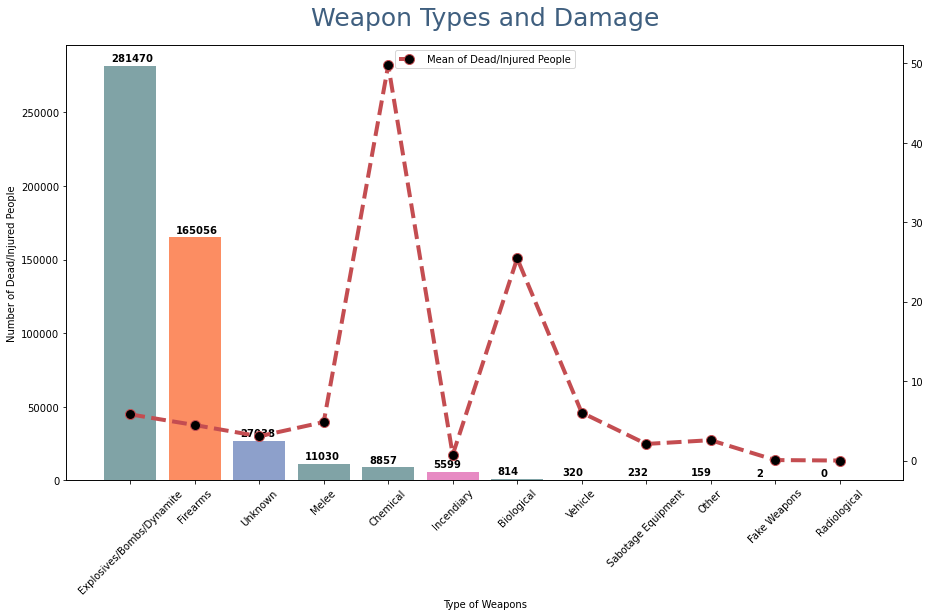

In [70]:
fig,ax1=plt.subplots(figsize=(15,8))
# Bar chart
ax1.bar(weaplabels,weapdmg,color=wcolor_list,align='center')
#Number in bar chart
for i,v in enumerate(weapdmg):
    ax1.text(i-0.3,v-13000 if v==37209 else v+3000, str(round(v)),color='w' if v==37209 else 'k',fontweight='bold')
#insert a second plot -line plot
ax2=ax1.twinx()
ax2.plot(weaplabels,w_rate,linestyle='--',linewidth=4,marker='o',markerfacecolor='black',markersize='10',
        label='Mean of Dead/Injured People',color='#C44D51')
plt.title('Weapon Types and Damage',fontsize=25,pad=20, color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
ax1.set(xlabel='Type of Weapons',ylabel='Number of Dead/Injured People')
ax1.set_xticklabels(weaplabels,rotation=45)
plt.yticks(fontsize=10)
ax2.legend(loc='upper center')
fig.show()

In [71]:
#Choose column Country and Damage from data
country_damage=data[data['Year']>1999][['Country','Damage']].groupby('Country',as_index=False).sum()

In [72]:
country_damage

,Country,Damage
0,Afghanistan,16671.0
1,Albania,0.0
2,Algeria,6269.0
3,Angola,1224.0
4,Argentina,1.0
...,...,...
157,Western Sahara,3.0
158,Yemen,1925.0
159,Yugoslavia,30.0
160,Zambia,2.0


In [73]:
data_paint=country_damage.sort_values(by='Damage',ascending=False).head(10)

In [74]:
data_paint

,Country,Damage
65,Iraq,83111.733333
106,Pakistan,24160.000000
61,India,20199.000000
0,Afghanistan,16671.000000
117,Russia,7890.000000
131,Sri Lanka,7406.000000
2,Algeria,6269.000000
111,Philippines,5489.000000
141,Thailand,4839.000000
28,Colombia,4734.000000


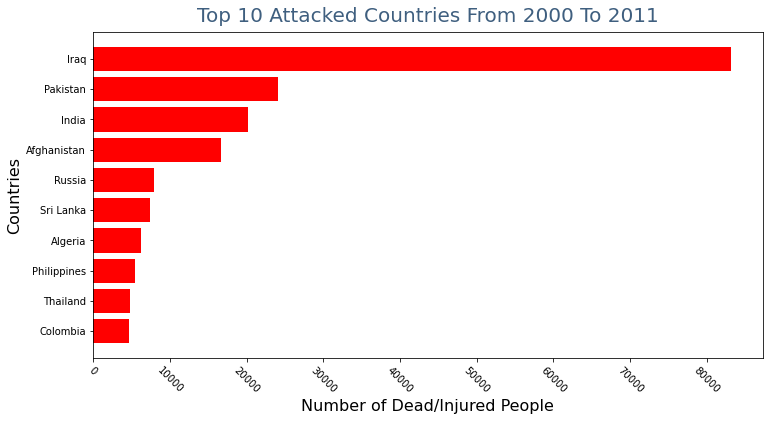

In [77]:
fig,ax=plt.subplots(figsize=(12,6))
ax.barh(data_paint['Country'][::-1],data_paint['Damage'][::-1],color='red')
plt.xticks(rotation=-45)
ax.set_ylabel('Countries',size=16)
ax.set_xlabel('Number of Dead/Injured People',size=16)
plt.title('Top 10 Attacked Countries From 2000 To 2011',fontsize=20,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.show()

In [79]:
#Choose column Country and Damage from data
nalty_dmg=data[data['Year']>1999][['Natlty1','Damage']].groupby('Natlty1',as_index=False).sum()

In [78]:
data['Natlty1']

0         Dominican Republic
1                    Belgium
2              United States
3              United States
4              United States
                 ...        
104684              Pakistan
104685                  Iraq
104686              Pakistan
104687              Pakistan
104688              Pakistan
Name: Natlty1, Length: 104689, dtype: object

In [80]:
data_paint_natly=nalty_dmg.sort_values(by='Damage',ascending=False).head(10)

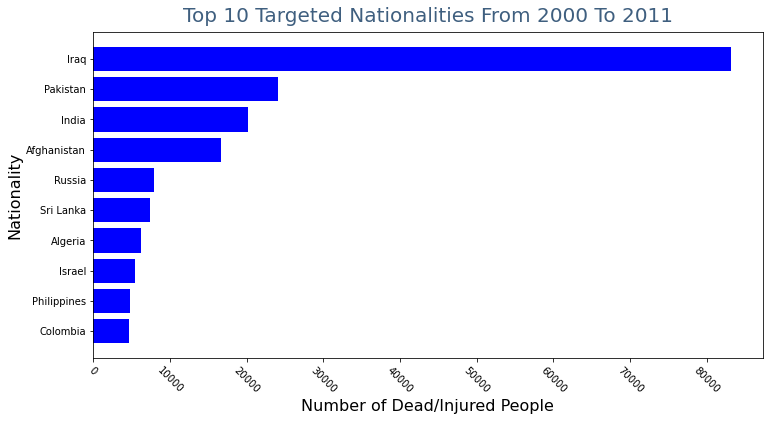

In [82]:
fig,ax=plt.subplots(figsize=(12,6))
ax.barh(data_paint_natly['Natlty1'][::-1],data_paint['Damage'][::-1],color='blue')
plt.xticks(rotation=-45)
ax.set_ylabel('Nationality',size=16)
ax.set_xlabel('Number of Dead/Injured People',size=16)
plt.title('Top 10 Targeted Nationalities From 2000 To 2011',fontsize=20,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.show()

In [83]:
country_damage[country_damage['Damage']==0]

,Country,Damage
1,Albania,0.0
13,Belize,0.0
35,Cyprus,0.0
71,Japan,0.0
83,Libya,0.0
100,New Zealand,0.0
107,Panama,0.0
108,Papua New Guinea,0.0
113,Portugal,0.0
114,Puerto Rico,0.0


In [84]:
len(country_damage[country_damage['Damage']==0])

16

In [91]:
def country_nationality(n):
    ''' Function to draw the bar charts of top 10 
    Attacked Countries and Top 10 Targeted Nationalities'''
    #Filter data and choose top 10 Attacked Counties
    top10_bad=data[data['Year']==n][['Country','Damage']].groupby('Country',as_index=False).sum()
    data_paint=top10_bad.sort_values(by='Damage',ascending=False).head(10)
    fig,ax=plt.subplots(1,2,figsize=(16,4))
    ax[0].barh(data_paint['Country'][::-1],data_paint['Damage'][::-1],
               color=['red','green','#344650','#df2029','#FFFC00',
                     '#E4405F','#3B5999','#00c300','#ff0084'])
    ax[0].set_ylabel('Countries',size=16)
    ax[0].set_xlabel('Number of Dead/Injured People',size=16)
    ax[0].set_title('Top 10 Attacked Countries %d' %n,fontsize=15,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
    
    plt.subplots_adjust(wspace=0.3)
    
    #Choose column Country and Damage from data
    nalty_dmg=data[data['Year']>1999][['Natlty1','Damage']].groupby('Natlty1',as_index=False).sum()
    data_paint_natly=nalty_dmg.sort_values(by='Damage',ascending=False).head(10)
    ax[1].barh(data_paint_natly['Natlty1'][::-1],data_paint['Damage'][::-1],color='blue')
    ax[1].set_ylabel('Nationality',size=16)
    ax[1].set_xlabel('Number of Dead/Injured People',size=16)
    ax[1].set_title('Top 10 Targeted Nationalities %d' %n,fontsize=20,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
    plt.show()
    for ax in fig.axes:
        plt.sca(ax)
    plt.show()

In [88]:
list_year=[]
for year in range(1970,1993): list_year.append(year)

In [89]:
for year in range(1994,2012): list_year.append(year)

In [93]:
for year in list_year:
    country_nationality(year)
    time.sleep(2)
    clear_output()

KeyboardInterrupt: 

<Figure size 1152x288 with 0 Axes>

In [96]:
def country_nationality_year():
    ''' Function to paint chart with specific input year'''
    # Input year. Try if in list year
    try:
        year=int(input('Input the year you want to see chart! (1970-2011): '))
        if year==1993:
            print('Sorry, No Terrorism Data in 1993')
            year=int(input('Input the year you want to see chart! (1970-2011): '))
        while year not in list_year:
            print('Please input the year from 1970 to 2011')
            year=int(input('Input the year you want to see chart! (1970-2011): '))
    except (ValueError,ZeroDivisionError) as ex:
        print('Wrong Type, Input Again: ')
        country_nationality_year()
    else:
        country_nationality(year)


Input the year you want to see chart! (1970-2011): 2000


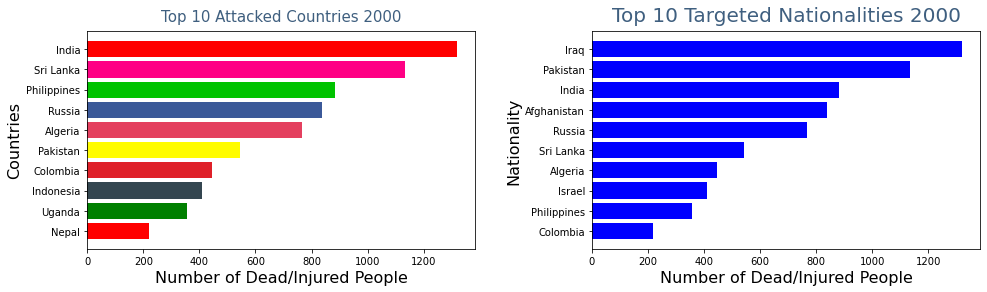

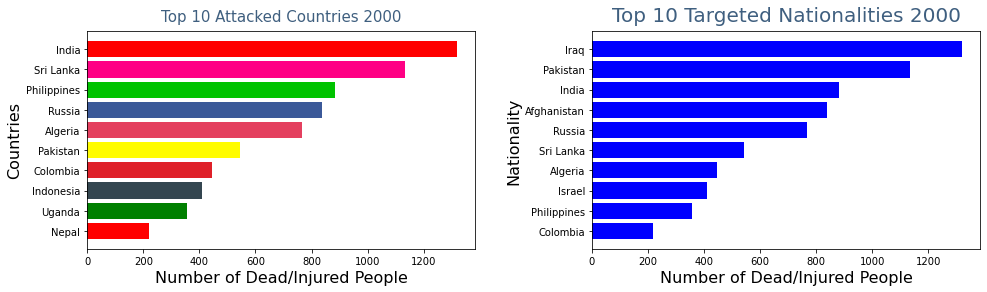

In [97]:
country_nationality_year()